<a href="https://colab.research.google.com/github/SewwandiDinu/Deep-Learning/blob/main/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1, l2 #import regulations
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

Load the MNIST dataset

In [94]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [1 6 3 8 5 3 1 4 0 1]


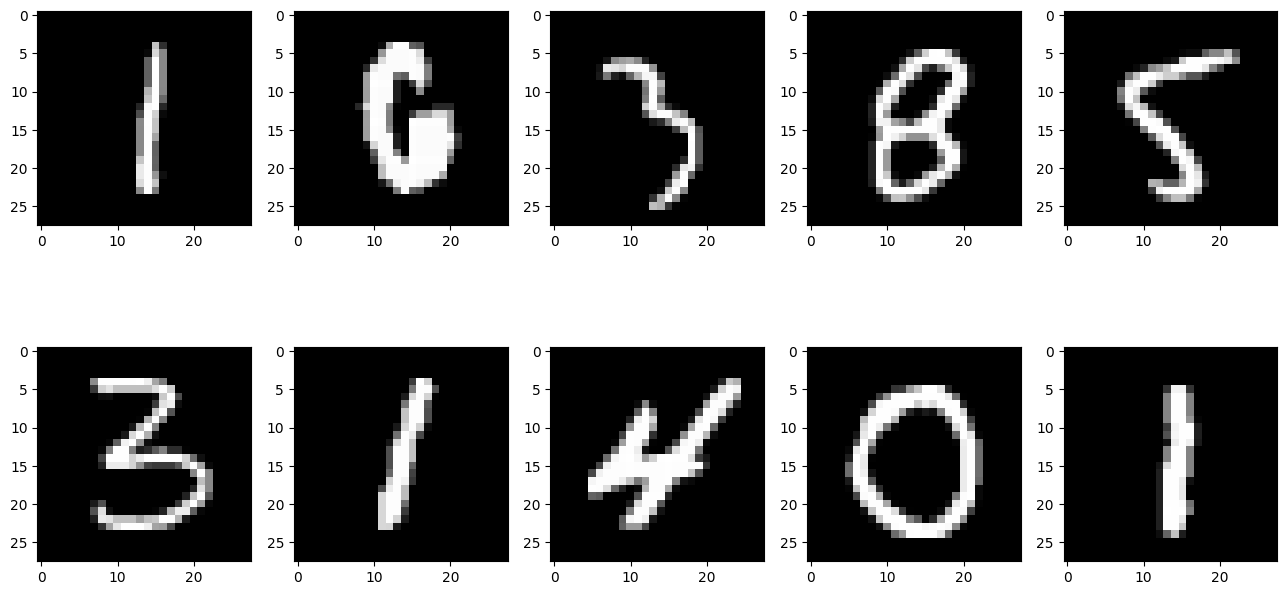

In [95]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [96]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [97]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu', kernel_regularizer=l1(0.001)))  # L1 regularization
model.add(Dense(32,input_dim=64,activation='relu', kernel_regularizer=l2(0.001)))  # L2 regularization
model.add(Dense(10,input_dim=32,activation='softmax', kernel_regularizer=l1(0.001)))  # L1 regularization
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 64)                50240     
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dense_39 (Dense)            (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [102]:
train_info = model.fit(new_train_data , new_train_target , epochs = 11)

Epoch 1/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1696 - accuracy: 0.9804
Epoch 2/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1602 - accuracy: 0.9825
Epoch 3/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1530 - accuracy: 0.9839
Epoch 4/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1466 - accuracy: 0.9842
Epoch 5/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1403 - accuracy: 0.9853
Epoch 6/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1358 - accuracy: 0.9862
Epoch 7/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1314 - accuracy: 0.9869
Epoch 8/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1272 - accuracy: 0.9872
Epoch 9/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1236 - accuracy: 0.9881
Epoch 10/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.119

Plot the loss and accuracy graphs

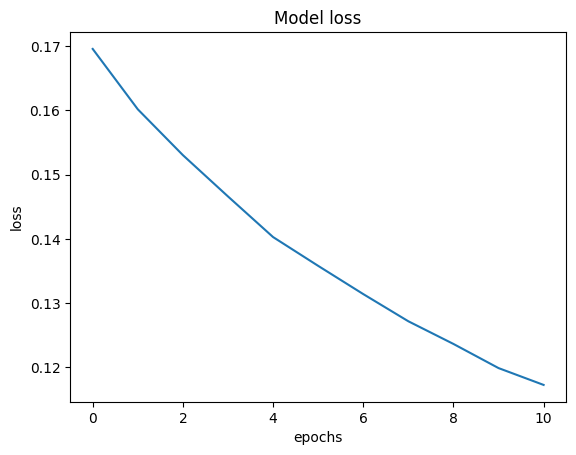

In [103]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

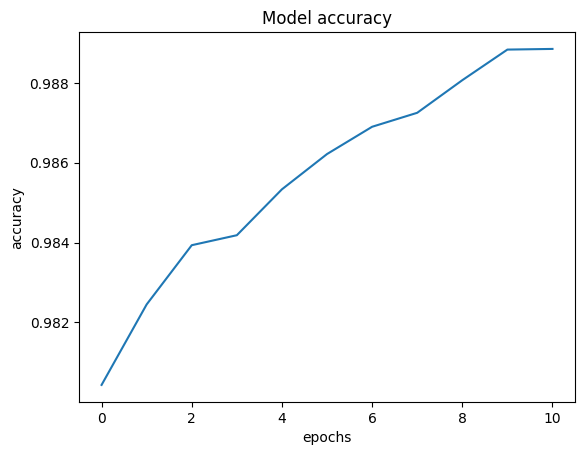

In [104]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [64]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2300 - accuracy: 0.9685
Loss of the Test dataset is: 0.2300306111574173
Accuracy of the test dataset is: 0.968500018119812


Save the model weights

In [39]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

Question 3.c

313/313 [==============================] - 1s 3ms/step


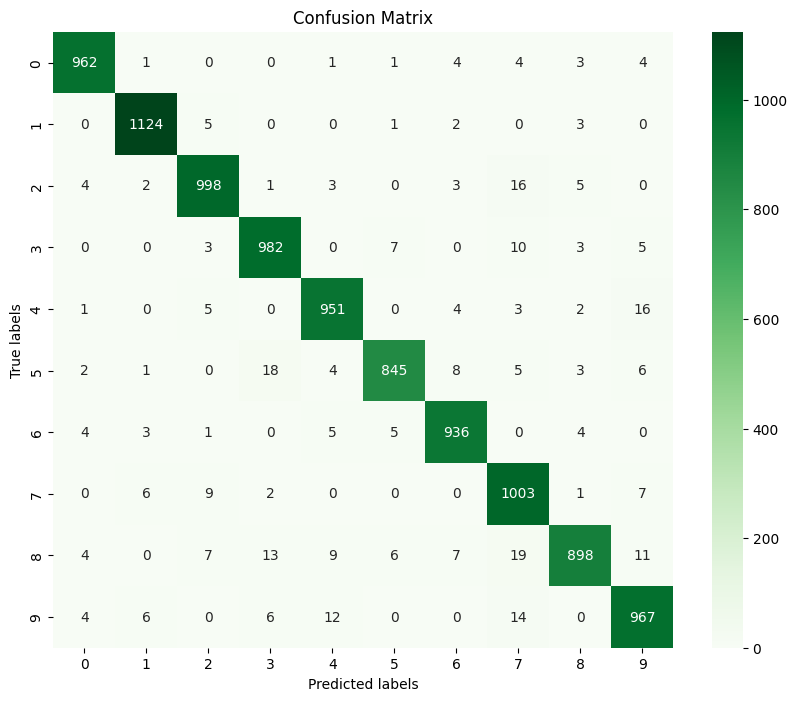

In [41]:
# Make predictions for the test dataset
predictions = model.predict(new_test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Generate confusion matrix
confusion_mtx = confusion_matrix(test_target, predicted_labels)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Greens', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()